Sección de instalación de librerías necesarias para completar la tarea

In [2]:
# !pip install pandas numpy matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, homogeneity_score

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#Usar el url para generar un dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
df = pd.read_csv(url, header=None, sep=',') #A pesar de ser csv, tengo que especificar el separador como coma o no separa nada
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'] #Asignación de nombres a las columnas generadas

Presentación del dataframe (información general)

In [5]:
print("Forma del DataFrame:", df.shape)
print("\n")
print("Primeras filas del DataFrame:\n", df.head())
print("\n")
print(df.describe())


Forma del DataFrame: (1372, 5)


Primeras filas del DataFrame:
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


Cabe destacar que en el sitio donde está disponible el dataframe, se nos informa que no hay nulos, por lo que esa parte de la limpieza se omite.

Como en este caso, no nos interesa trabajar en torno a algoritmos supervisados, podemos perfectamente dividir el dataset y usar los datos que comunmente irian en el eje X.

Ahora, se grafica las distintas variables con respecto a si mismas separadas en base a la clase que pertenecen para tener una visión general del dataset.

[]

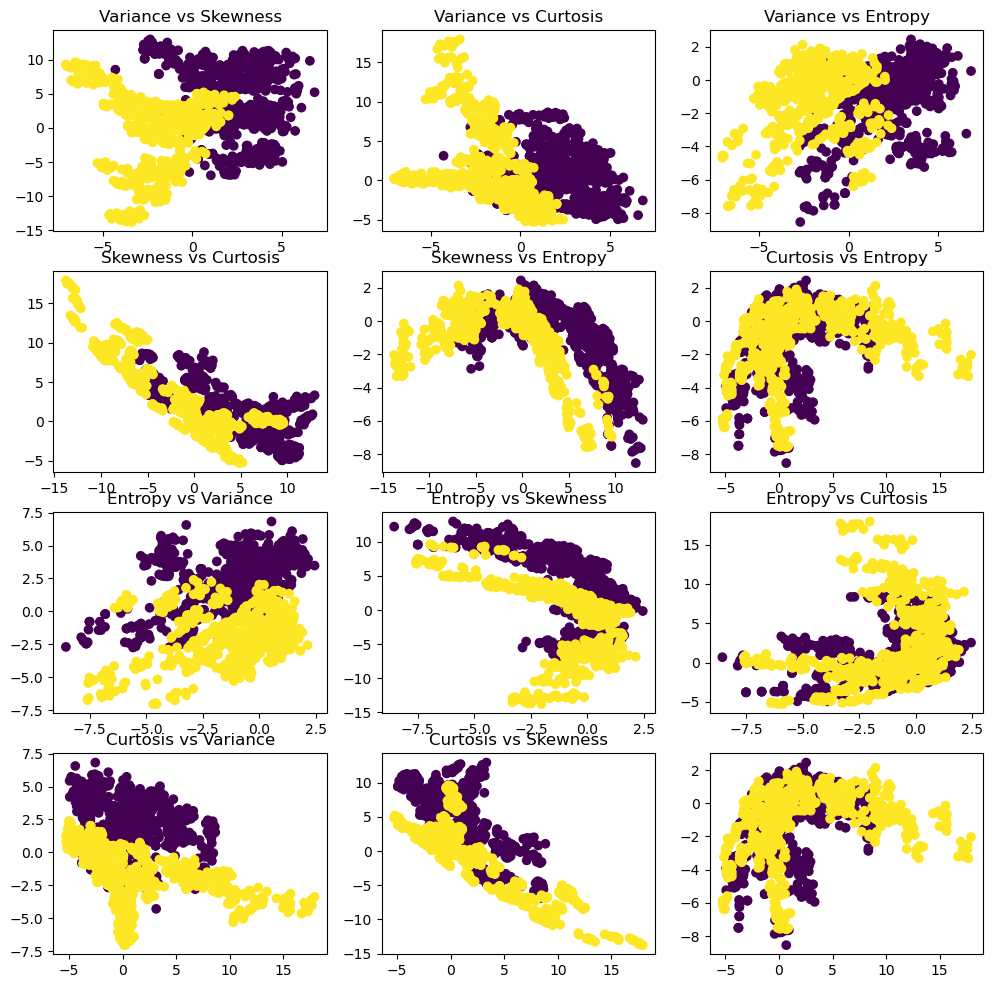

In [6]:
figure, axis = plt.subplots(4, 3, figsize=(12, 12))
# Graficar las variables

#Variance vs Skewness, Curtosis y entropy
axis[0,0].scatter(df['Variance'], df['Skewness'], c=df['Class'], cmap='viridis')
axis[0,0].set_title('Variance vs Skewness')
axis[0,1].scatter(df['Variance'], df['Curtosis'], c=df['Class'], cmap='viridis')
axis[0,1].set_title('Variance vs Curtosis')
axis[0,2].scatter(df['Variance'], df['Entropy'], c=df['Class'], cmap='viridis')
axis[0,2].set_title('Variance vs Entropy')

#skewness vs Curtosis, entropy y variance
axis[1,0].scatter(df['Skewness'], df['Curtosis'], c=df['Class'], cmap='viridis')
axis[1,0].set_title('Skewness vs Curtosis')
axis[1,1].scatter(df['Skewness'], df['Entropy'], c=df['Class'], cmap='viridis')
axis[1,1].set_title('Skewness vs Entropy')
axis[1,2].scatter(df['Curtosis'], df['Entropy'], c=df['Class'], cmap='viridis')
axis[1,2].set_title('Curtosis vs Entropy')

#Entropy vs Variance, Skewness y Curtosis
axis[2,0].scatter(df['Entropy'], df['Variance'], c=df['Class'], cmap='viridis')
axis[2,0].set_title('Entropy vs Variance')
axis[2,1].scatter(df['Entropy'], df['Skewness'], c=df['Class'], cmap='viridis')
axis[2,1].set_title('Entropy vs Skewness')
axis[2,2].scatter(df['Entropy'], df['Curtosis'], c=df['Class'], cmap='viridis')
axis[2,2].set_title('Entropy vs Curtosis')

# Curtosis vs Variance, Skewness y Entropy
axis[3,0].scatter(df['Curtosis'], df['Variance'], c=df['Class'], cmap='viridis')
axis[3,0].set_title('Curtosis vs Variance')
axis[3,1].scatter(df['Curtosis'], df['Skewness'], c=df['Class'], cmap='viridis')
axis[3,1].set_title('Curtosis vs Skewness')
axis[3,2].scatter(df['Curtosis'], df['Entropy'], c=df['Class'], cmap='viridis')

plt.plot()



In [7]:
df_features = df.drop('Class', axis=1) 

#Ahora toca aplicar el escalado de los datos para evitar distorsiones producidas por el margen de variación de los datos

df_scaled = StandardScaler().fit_transform(df_features)
print("\nDatos escalados:\n", df_scaled[:5])  


Datos escalados:
 [[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 [ 1.06374236  1.29547754 -1.25539712 -1.14402883]
 [-0.03677175 -1.0870383   0.73673042  0.09658697]]


Ahora, como los datos ya están escalados, vamos a aplicar PCA como TSNE.

PCA

Text(0.5, 1.0, 'PCA of Banknote Authentication Data')

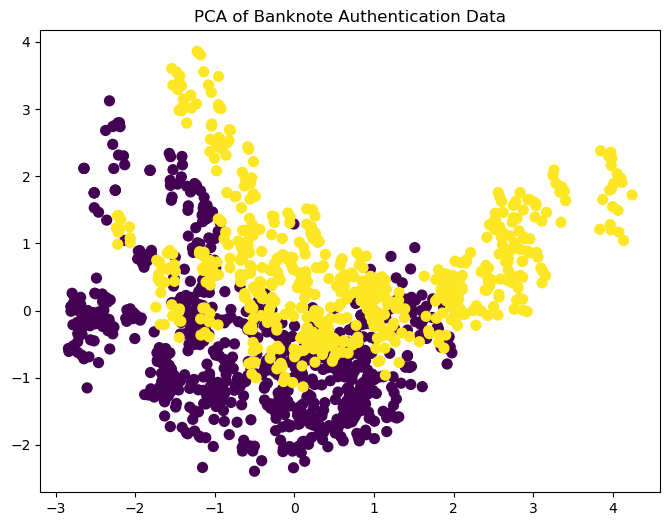

In [8]:
pca = PCA(n_components=2)
#n_componets es el número de dimensiones a las que uno reduce los datos
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Class'], cmap='viridis', s=50)
plt.title('PCA of Banknote Authentication Data')





Ahora TSNE

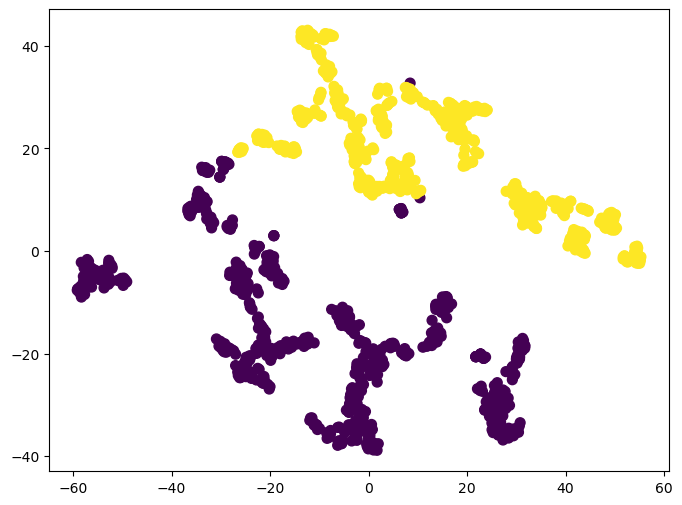

In [9]:
tsne = TSNE(n_components=2, random_state=0)
#n_componets es el número de dimensiones a las que uno reduce los datos
df_tsne = tsne.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['Class'], cmap='viridis', s=50)

Ahora hay que proceder a hacer el apartado de los clústerers, en este caso, se van a hacer 2 métodos distintos: K-means y DBScan. 
Para trabajar con estos algoritmos, usaremos los resultados de PCA dado que se ven muchos mas claros.

In [10]:
dictionart = {'c': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
for c in dictionart['c']:
    kmeans = KMeans(n_clusters=c, random_state=0)
    kmeans_fit = kmeans.fit(df_pca)
    print("Cantidad de clusters:", kmeans_fit.n_clusters)
    print("silhouette_score:", silhouette_score(df_pca, kmeans_fit.labels_))
    print("homogeneity_score:", homogeneity_score(df['Class'], kmeans_fit.labels_))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 2
silhouette_score: 0.39076994740709103
homogeneity_score: 0.01080682247749942


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 4
silhouette_score: 0.3871183659049763
homogeneity_score: 0.15996479903785057


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 6
silhouette_score: 0.38295459916352736
homogeneity_score: 0.2805154794172717


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 8
silhouette_score: 0.380294879068806
homogeneity_score: 0.3375944674616843


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 10
silhouette_score: 0.3910431031465648
homogeneity_score: 0.39995677148266967


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 12
silhouette_score: 0.3948367541706205
homogeneity_score: 0.45170977091938974


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 14
silhouette_score: 0.3935226380386978
homogeneity_score: 0.49067968887252345


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 16
silhouette_score: 0.39669777471434653
homogeneity_score: 0.4565876148936463


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 18
silhouette_score: 0.4028849893314725
homogeneity_score: 0.45721868182892217


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cantidad de clusters: 20
silhouette_score: 0.3951444869668689
homogeneity_score: 0.4279858523316213


Como el mejor resultado da con 18 clusters, se usará ese para la evaluación final

In [11]:
kmeans = KMeans(n_clusters=18, random_state=7)
kmeans_ = kmeans.fit_predict(df_pca)
#DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7, metric='euclidean')
dbscan_ = dbscan.fit_predict(df_pca)
# Evaluación de los clusters
if len(set(dbscan_)) > 1:
    score = silhouette_score(df_pca, dbscan_)
    print("Silhouette Score DBSCAN:", score)
else:
    print("Silhouette Score DBSCAN: No se puede calcular, solo hay un cluster")

if len(set(dbscan_)) > 1:
    homogeneity_dbscan = homogeneity_score(df['Class'], dbscan_)
    print("Homogeneity Score DBSCAN:", homogeneity_dbscan)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Silhouette Score DBSCAN: 0.2317696585868526
Homogeneity Score DBSCAN: 0.0638045342816462


Text(0.5, 1.0, 'DBSCAN Clustering en PCA Data')

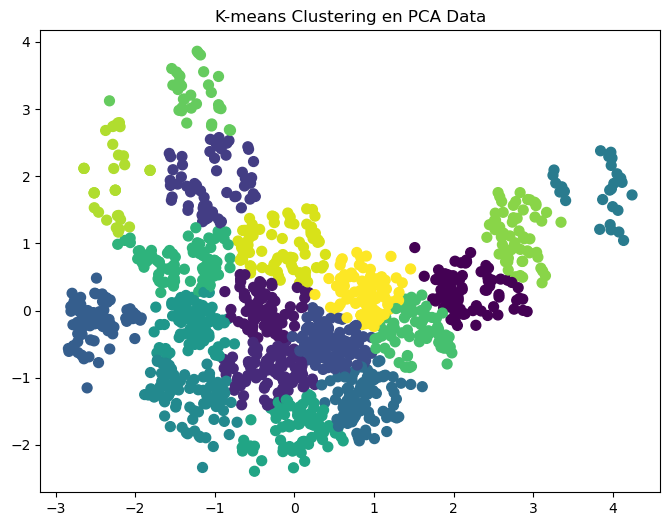

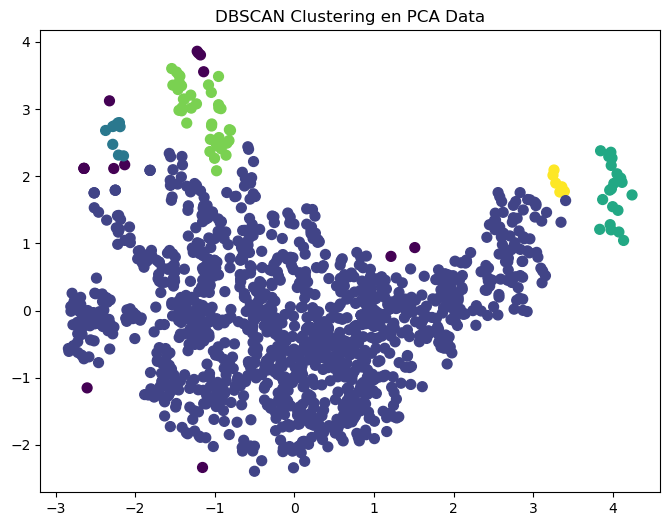

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_, cmap='viridis', s=50)
plt.title('K-means Clustering en PCA Data')

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_, cmap='viridis', s=50)
plt.title('DBSCAN Clustering en PCA Data')